In [1]:
%reset

In [1]:
organization = [
    "0-verbose",
    "1-medium",
    "2-concise"]

task = 'output/rs'

configurations = [
    "rs_conv_out.pkl",
    "rs_conv_struct_out.pkl",
    "rs_struct_summ_out.pkl",
    "rs_struct_desc_out.pkl",
    "rs_struct_summ_desc_out.pkl"
]

import pickle
outputs = []

for c in configurations:
    output_internal = []
    for o in organization:
        file = (f"{task}/{o}/{c}")
        #open file and append to list
        with open(file, 'rb') as f:
            output_internal.append(pickle.load(f))
    outputs.append(output_internal)

row_total = []

for o in outputs:
    row_int = []
    for c in o:
        row = []
        for d in zip(c['row']):
            row.append(d)
        row_int.append(row)

    row_total.append(row_int)

In [2]:
#import libraries for plotting fancy graphs
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
accuracies = []

for c in row_total:
    accuracy_int = []
    for o in c:
        x = [o_i[0] for o_i in o]
        accuracy_int.append(sum(x)/len(x))
    accuracies.append(accuracy_int)

print(accuracies)

[[0.6267716535433071, 0.6188976377952756, 0.6173228346456693], [0.6110236220472441, 0.6094488188976378, 0.6157480314960629], [0.5700787401574803, 0.5559055118110237, 0.5716535433070866], [0.552755905511811, 0.5653543307086614, 0.5622047244094488], [0.5700787401574803, 0.5700787401574803, 0.5826771653543307]]


In [4]:
import numpy as np

configurations = [
    "CONV",
    "CONV+STRUCT",
    "STRUCT+SUMM",
    "STRUCT+DESC",
    "STRUCT+SUMM+DESC"
]

palette = [
    "#F69908",
    "#F55502",
    "#0C0CF5",
    "#0784F5",
    "#A0793A",
    "#75513E"
]

[[0.6267716535433071, 0.6188976377952756, 0.6173228346456693], [0.6110236220472441, 0.6094488188976378, 0.6157480314960629], [0.5700787401574803, 0.5559055118110237, 0.5716535433070866], [0.552755905511811, 0.5653543307086614, 0.5622047244094488], [0.5700787401574803, 0.5700787401574803, 0.5826771653543307]]
[0.6209973753280841, 0.6120734908136484, 0.5658792650918635, 0.5601049868766403, 0.5742782152230971]
[0.004133337466672872, 0.0026766506633032683, 0.007081752001696588, 0.0053533013266066016, 0.005938954592642919]


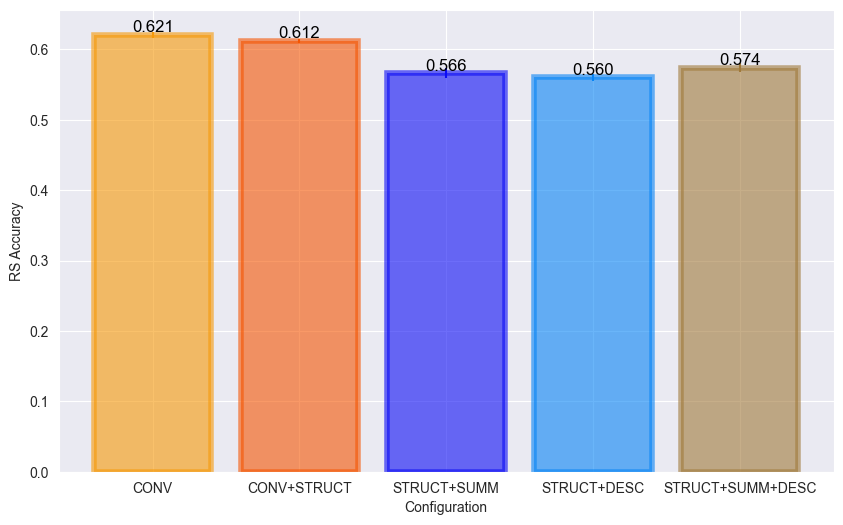

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
#personalize palette



avg_macro_accuracy = [np.mean(x) for x in accuracies]
std_macro_accuracy = [np.std(x) for x in accuracies]

print(accuracies)
print(avg_macro_accuracy)
print(std_macro_accuracy)

min_alpha = 0.3
max_alpha = 1.0

for i in range(len(configurations)):
    alpha = 0.6
    ax.bar(configurations[i], avg_macro_accuracy[i], yerr=std_macro_accuracy[i], color=palette[i], alpha=alpha, linewidth=4, edgecolor = palette[i], ecolor=palette[i])
    #put the values in the middle of the bar, with a little slope
    ax.text(i, avg_macro_accuracy[i], f"{avg_macro_accuracy[i]:.3f}", ha='center', va='bottom', rotation=0, fontsize=12, color='black')


ax.set_ylabel('RS Accuracy')
ax.set_xlabel('Configuration')
plt.show()

[[0, 1, 2, 3, 4], [0.3, 1.3, 2.3, 3.3, 4.3], [0.6, 1.6, 2.6, 3.6, 4.6]]
0


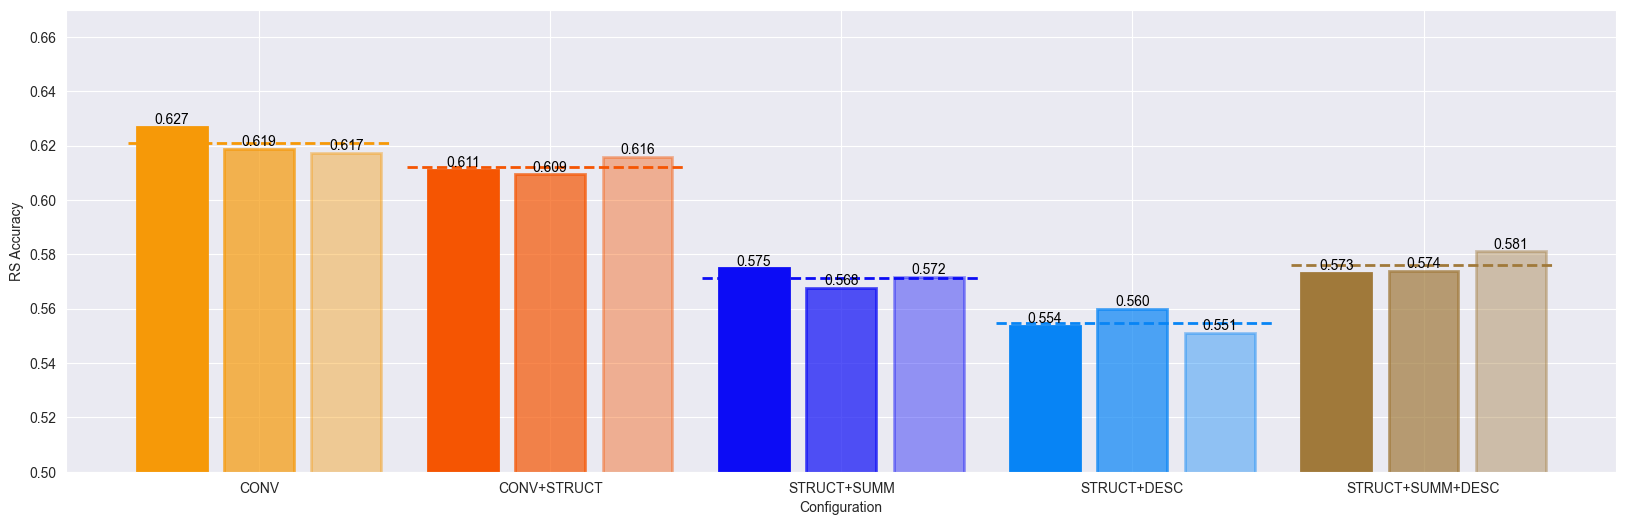

In [7]:
S0 = [acc[0] for acc in accuracies_plot1]

S1 = [acc[1] for acc in accuracies_plot1]

S2 = [acc[2] for acc in accuracies_plot1]

CONV_sp = [S0[0], S1[0], S2[0]]
CONV_STRUCT_sp = [S0[1], S1[1], S2[1]]
SUMM_STRUCT_sp = [S0[2], S1[2], S2[2]]
DESC_STRUCT_sp = [S0[3], S1[3], S2[3]]
SUMM_DESC_STRUCT_sp = [S0[4], S1[4], S2[4]]

import numpy as np
import matplotlib.pyplot as plt
# Sample data
categories = configurations
regions = ['S0', 'S1', 'S2']

#merge S0 S1 and S2 in a unique matrix with dimensions size=(len(categories), len(regions))
values = np.array([S0, S1, S2]).T

# Set the width of the bars
bar_width = 0.15  # Adjust as needed

# Set the positions of the bars on the x-axis
r = np.arange(len(categories))

tot = 20

fig, ax = plt.subplots(figsize=(tot, 6))

# Set the width of the bars
bar_width = 0.3

# Set the positions of the bars on the x-axis
r1 = [x for x in range(len(categories))]
r2 = [x + bar_width for x in r1]
r3 = [x + 2*bar_width for x in r1]

rr = [r1, r2, r3]

print(rr)

alpha = [1.0, 0.7, 0.4]


for i in range(3):
    minimum_score = min(CONV_sp)
    maximum_score = max(CONV_sp)
    ax.bar(rr[i][0], CONV_sp[i], color=palette[0], alpha= alpha[i], width=bar_width*0.8, linewidth=2, edgecolor = palette[0], ecolor=palette[0])
    ax.text(rr[i][0], CONV_sp[i], f"{CONV_sp[i]:.3f}", ha='center', va='bottom', rotation=0, fontsize=10, color='black')

ax.axhline(y=avg_macro_accuracy[0], xmin=0.04, xmax=0.21, color=palette[0], linestyle='--', linewidth=2)
print(rr[0][0])

for i in range(3):
    minimum_score = min(CONV_STRUCT_sp)
    maximum_score = max(CONV_STRUCT_sp)
    ax.bar(rr[i][1], CONV_STRUCT_sp[i], color=palette[1], alpha= alpha[i], width=bar_width*0.8, linewidth=2, edgecolor = palette[1], ecolor=palette[1])
    ax.text(rr[i][1], CONV_STRUCT_sp[i], f"{CONV_STRUCT_sp[i]:.3f}", ha='center', va='bottom', rotation=0, fontsize=10, color='black')

ax.axhline(y=avg_macro_accuracy[1], xmin=0.22, xmax=0.4, color=palette[1], linestyle='--', linewidth=2)


for i in range(3):
    minimum_score = min(SUMM_STRUCT_sp)
    maximum_score = max(SUMM_STRUCT_sp)
    ax.bar(rr[i][2], SUMM_STRUCT_sp[i], color=palette[2], alpha= alpha[i], width=bar_width*0.8, linewidth=2, edgecolor = palette[2], ecolor=palette[2])
    ax.text(rr[i][2], SUMM_STRUCT_sp[i], f"{SUMM_STRUCT_sp[i]:.3f}", ha='center', va='bottom', rotation=0, fontsize=10, color='black')

ax.axhline(y=avg_macro_accuracy[2], xmin=0.41, xmax=0.59, color=palette[2], linestyle='--', linewidth=2)


for i in range(3):
    minimum_score = min(DESC_STRUCT_sp)
    maximum_score = max(DESC_STRUCT_sp)
    ax.bar(rr[i][3], DESC_STRUCT_sp[i], color=palette[3], alpha= alpha[i], width=bar_width*0.8, linewidth=2, edgecolor = palette[3], ecolor=palette[3])
    ax.text(rr[i][3], DESC_STRUCT_sp[i], f"{DESC_STRUCT_sp[i]:.3f}", ha='center', va='bottom', rotation=0, fontsize=10, color='black')

ax.axhline(y=avg_macro_accuracy[3], xmin=0.60, xmax=0.78, color=palette[3], linestyle='--', linewidth=2)


for i in range(3):
    minimum_score = min(SUMM_DESC_STRUCT_sp)
    maximum_score = max(SUMM_DESC_STRUCT_sp)
    ax.bar(rr[i][4], SUMM_DESC_STRUCT_sp[i], color=palette[4], alpha= alpha[i], width=bar_width*0.8, linewidth=2, edgecolor = palette[4], ecolor=palette[4])
    ax.text(rr[i][4], SUMM_DESC_STRUCT_sp[i], f"{SUMM_DESC_STRUCT_sp[i]:.3f}", ha='center', va='bottom', rotation=0, fontsize=10, color='black')

ax.axhline(y=avg_macro_accuracy[4], xmin=0.79, xmax=0.96, color=palette[4], linestyle='--', linewidth=2)

#set minimum and maximum values for y axis
ax.set_ylim([0.5, 0.67])


plt.xticks([r + bar_width*2/2 for r in range(len(configurations))], configurations)
#ax.set_ylabel('STRUCT + SUMM + DESC Score ')
ax.set_ylabel('RS Accuracy')
ax.set_xlabel('Configuration')
plt.show()

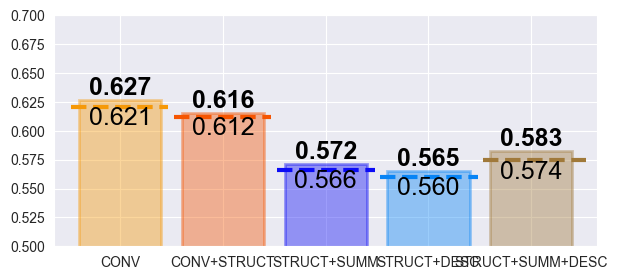

In [6]:
S0 = [acc[0] for acc in accuracies]

S1 = [acc[1] for acc in accuracies]

S2 = [acc[2] for acc in accuracies]

CONV_sp = [S0[0], S1[0], S2[0]]
CONV_STRUCT_sp = [S0[1], S1[1], S2[1]]
SUMM_STRUCT_sp = [S0[2], S1[2], S2[2]]
DESC_STRUCT_sp = [S0[3], S1[3], S2[3]]
SUMM_DESC_STRUCT_sp = [S0[4], S1[4], S2[4]]

import numpy as np
import matplotlib.pyplot as plt

# Sample data
categories = configurations
regions = ['S0', 'S1', 'S2']

#merge S0 S1 and S2 in a unique matrix with dimensions size=(len(categories), len(regions))
values = np.array([S0, S1, S2]).T

# Set the width of the bars
bar_width = 0.15  # Adjust as needed

# Set the positions of the bars on the x-axis
r = np.arange(len(categories))

tot = 7

fig, ax = plt.subplots(figsize=(tot, 3))

# Set the width of the bars
bar_width = 1

# Set the positions of the bars on the x-axis
rr = [x for x in range(len(categories))]

min_alpha = 0.5

alpha = [1.0, 0.7, 0.4]

maximum_score = max(CONV_sp)
ax.bar(rr[0], maximum_score, color=palette[0], alpha=alpha[2], width=bar_width * 0.8, linewidth=2, edgecolor=palette[0],
       ecolor=palette[0])
ax.text(rr[0], maximum_score, f"{maximum_score:.3f}", ha='center', va='bottom', rotation=0, fontsize=18, color='black',
        weight='bold')
ax.axhline(y=avg_macro_accuracy[0], xmin=0.03, xmax=0.21, color=palette[0], linestyle='--', linewidth=3)
ax.text(rr[0], avg_macro_accuracy[0], f"{avg_macro_accuracy[0]:.3f}", ha='center', va='top', rotation=0, fontsize=18,
        color='black')

maximum_score = max(CONV_STRUCT_sp)
ax.bar(rr[1], maximum_score, color=palette[1], alpha=alpha[2], width=bar_width * 0.8, linewidth=2, edgecolor=palette[1],
       ecolor=palette[1])
ax.text(rr[1], maximum_score, f"{maximum_score:.3f}", ha='center', va='bottom', rotation=0, fontsize=18, color='black',
        weight='bold')
ax.axhline(y=avg_macro_accuracy[1], xmin=0.22, xmax=0.4, color=palette[1], linestyle='--', linewidth=3)
ax.text(rr[1], avg_macro_accuracy[1], f"{avg_macro_accuracy[1]:.3f}", ha='center', va='top', rotation=0, fontsize=18,
        color='black')

maximum_score = max(SUMM_STRUCT_sp)
ax.bar(rr[2], maximum_score, color=palette[2], alpha=alpha[2], width=bar_width * 0.8, linewidth=2, edgecolor=palette[2],
       ecolor=palette[2])
ax.text(rr[2], maximum_score, f"{maximum_score:.3f}", ha='center', va='bottom', rotation=0, fontsize=18, color='black',
        weight='bold')
ax.axhline(y=avg_macro_accuracy[2], xmin=0.41, xmax=0.59, color=palette[2], linestyle='--', linewidth=3)
ax.text(rr[2], avg_macro_accuracy[2], f"{avg_macro_accuracy[2]:.3f}", ha='center', va='top', rotation=0, fontsize=18,
        color='black')

maximum_score = max(DESC_STRUCT_sp)
ax.bar(rr[3], maximum_score, color=palette[3], alpha=alpha[2], width=bar_width * 0.8, linewidth=2, edgecolor=palette[3],
       ecolor=palette[3])
ax.text(rr[3], maximum_score, f"{maximum_score:.3f}", ha='center', va='bottom', rotation=0, fontsize=18, color='black',
        weight='bold')
ax.axhline(y=avg_macro_accuracy[3], xmin=0.6, xmax=0.78, color=palette[3], linestyle='--', linewidth=3)
ax.text(rr[3], avg_macro_accuracy[3], f"{avg_macro_accuracy[3]:.3f}", ha='center', va='top', rotation=0, fontsize=18,
        color='black')

maximum_score = max(SUMM_DESC_STRUCT_sp)
ax.bar(rr[4], maximum_score, color=palette[4], alpha=alpha[2], width=bar_width * 0.8, linewidth=2, edgecolor=palette[4],
       ecolor=palette[4])
ax.text(rr[4], maximum_score, f"{maximum_score:.3f}", ha='center', va='bottom', rotation=0, fontsize=18, color='black',
        weight='bold')
ax.axhline(y=avg_macro_accuracy[4], xmin=0.79, xmax=0.98, color=palette[4], linestyle='--', linewidth=3)
ax.text(rr[4], avg_macro_accuracy[4], f"{avg_macro_accuracy[4]:.3f}", ha='center', va='top', rotation=0, fontsize=18,
        color='black')

ax.set_ylim([0.5, 0.7])
plt.xticks([r for r in range(len(configurations))], configurations)
